In [20]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [21]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [22]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [40]:
df_test=df[['Tweet']]
df_test.head(10)

,Tweet
0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...
6,deklarasi pilkada 2018 aman dan anti hoax warg...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...
8,Nah admin belanja satu lagi port terbaik nak m...
9,USER Enak lg klo smbil ngewe'


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [24]:
df.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [25]:
def klasifikasi(HS):
    if (HS == 1):
        return 'Yes'
    elif (HS == 0):
        return 'No'

def klasifikasi(Abusive):
    if (Abusive == 1):
        return 'Yes'
    elif (Abusive == 0):
        return 'No'
    
df['Tipe klasifikasi HS'] = df['HS'].apply(lambda x: klasifikasi(x))
df['Tipe klasifikasi Abusive']= df['Abusive'].apply(lambda x: klasifikasi(x))
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tipe klasifikasi HS,Tipe klasifikasi Abusive
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Yes,Yes
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,No,Yes
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,No,No
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,No,No
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Yes,Yes


In [26]:
klasifikasi = df[["Tweet", "HS", "Abusive", "Tipe klasifikasi HS", "Tipe klasifikasi Abusive"]]
klasifikasi.head()

,Tweet,HS,Abusive,Tipe klasifikasi HS,Tipe klasifikasi Abusive
0,- disaat semua cowok berusaha melacak perhatia...,1,1,Yes,Yes
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,No,Yes
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,No,No
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,No,No
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,Yes,Yes


In [35]:
klasifikasi['Tipe klasifikasi HS'].value_counts()

No     7608
Yes    5561
Name: Tipe klasifikasi HS, dtype: int64

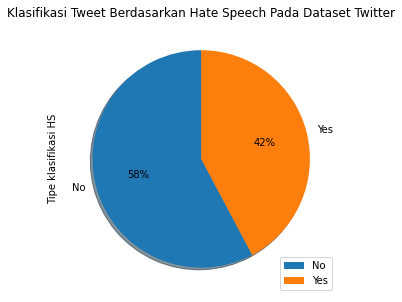

In [27]:
klasifikasi['Tipe klasifikasi HS'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.f%%', startangle=90, shadow=True)

plt.legend(['No', 'Yes'])
plt.title('Klasifikasi Tweet Berdasarkan Hate Speech Pada Dataset Twitter')

plt.show()

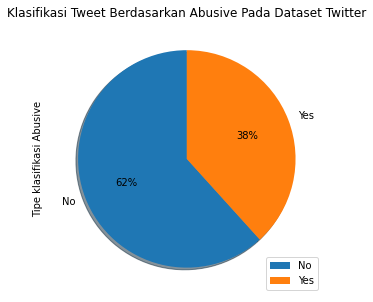

In [28]:
klasifikasi['Tipe klasifikasi Abusive'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.f%%', startangle=90, shadow=True)

plt.legend(['No', 'Yes'])
plt.title('Klasifikasi Tweet Berdasarkan Abusive Pada Dataset Twitter')

plt.show()

In [29]:
df1=df[['HS_Individual', 'HS_Group']]
df1.sum()

HS_Individual    3575
HS_Group         1986
dtype: int64

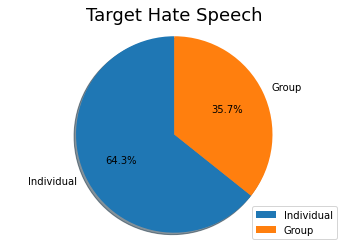

In [30]:
target_HS = ("Individual", "Group")
HS1 = (3575, 1986)

fig1, ax1 = plt.subplots()
ax1.pie(HS1, labels=target_HS, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Target Hate Speech', fontsize=18)
ax1.legend(target_HS, loc="best")
plt.show()


In [31]:
df2=df[['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other' ]]
df2.sum()

HS_Religion     793
HS_Race         566
HS_Physical     323
HS_Gender       306
HS_Other       3740
dtype: int64

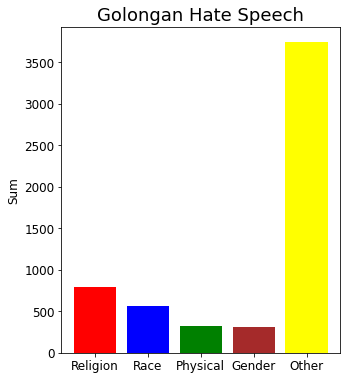

In [32]:
tipe_HS = ("Religion", "Race", "Physical", "Gender", "Other")
HS1 = (793, 566, 323, 306, 3740)
my_color='red','blue','green','brown','yellow'

plt.figure(figsize=(5,6))
plt.bar(tipe_HS, HS1, color=my_color,)

plt.title('Golongan Hate Speech', size=18)
plt.ylabel('Sum', size=12)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [33]:
df3=df[['HS_Weak', 'HS_Moderate', 'HS_Strong']]
df3.sum()

HS_Weak        3383
HS_Moderate    1705
HS_Strong       473
dtype: int64

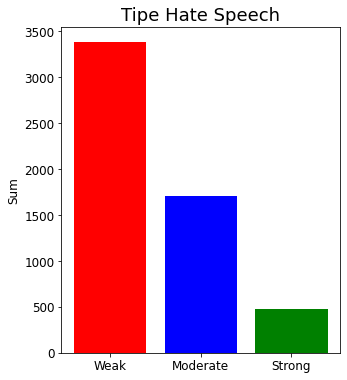

In [34]:
tipe_HS = ("Weak", "Moderate", "Strong")
HS1 = (3383, 1705, 473)
my_color='red','blue','green'

plt.figure(figsize=(5,6))
plt.bar(tipe_HS, HS1, color=my_color,)

plt.title('Tipe Hate Speech', size=18)
plt.ylabel('Sum', size=12)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [44]:
df5=pd.read_csv('file cleansing.csv')
df5.head(9)

,Tweet,New_Tweet
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap sa...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku n nku tau matamu sipit tapi dilia...
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dar...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,ya bani taplak dkk xf0 x9f x98 x84 xf0 x9f x9...
6,deklarasi pilkada 2018 aman dan anti hoax warg...,deklarasi pilkada 2018 aman dan anti hoax warg...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,saya baru aja kelar re watch aldnoah zero pali...
8,Nah admin belanja satu lagi port terbaik nak m...,nah admin belanja satu lagi po terbaik nak mak...
